# MPESA STATEMENT ANALYSIS 
### Author Kibet kemboi 

# 1.0 Business Understanding 
## 1.1 Business Problem 
Difficulty in gaining comprehensive insights into financial transactions and managing expenses effectively using M-Pesa statements, hindering accurate expense tracking, budgeting, financial goal setting, and fraud detection for businesses. By leveraging these insights, individuals can enhance their financial management practices, optimize expenses, mitigate risks, and make strategic decisions to drive growth and financial stability.

## 1.2 Objectives 
1. To track and categorize expenses accurately by analyzing M-Pesa transactions.
2. To create and maintain a budget based on insights from the analysis of M-Pesa statements, identifying areas for cost-cutting and efficient fund allocation.
3. To set financial goals and monitor progress by reviewing and analyzing M-Pesa transactions.
4. To detect and mitigate fraud risks by carefully examining M-Pesa statements for unauthorized or suspicious transactions and promptly reporting any discrepancies.

# 2.0 Data understanding 
- The data came from 1 year from `june 2022` to `june 2023` mpesa statement for Nelson Kibet Kemboi 
- The data had 7631 rows and 7 columns

In [1]:
#importing neccessary libraries 
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns 
import warnings 

# Ignore any warning messages
warnings.filterwarnings("ignore")

# Set seaborn grid style to "darkgrid"
sns.set_style("darkgrid")



In [2]:
#reading file one 
data1 = pd.read_excel('mpesa_data1.xlsx')
#reading file two
data2 = pd.read_excel('mpesa_data2.xlsx')
#reading file three 
data3 = pd.read_excel('mpesa_data3.xlsx')
#reading data 4
paid_df = pd.read_excel('paid_in_data.xlsx')

In [3]:
#merging all dataframes 
merged_data = pd.concat([data1, data2, data3], ignore_index=True)
#convert to  new excel file 
merged_data.to_excel('merged_data.xlsx', index=False)
#checking the new dataframe 
merged_data

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RGE2J693L4,2023-07-14 18:39:29,Customer Transfer of Funds Charge,Completed,NaN,-6,194
1,RGE2J693L4,2023-07-14 18:39:29,Customer Transfer to -,Completed,NaN,-350,200
2,NaN,NaN,2547******198 Onesmus Njogu,NaN,NaN,NaN,NaN
3,RGE5J63C7N,2023-07-14 18:38:26,Merchant Payment to 7865893 Naivas Nakuru MidTown,Completed,NaN,-15,550
4,RGE2J5ZVRA,2023-07-14 18:37:52,Merchant Payment to 7865893 Naivas Nakuru MidTown,Completed,NaN,-726,565
...,...,...,...,...,...,...,...
7626,NaN,NaN,Original conversation ID is 714593888236.,NaN,NaN,NaN,NaN
7627,QD15N3LHJR,2022-04-01 16:27:30,Business Payment from 300600 Equity Bulk Accou...,Completed,1000,NaN,1100
7628,NaN,NaN,Original conversation ID is 353365002187.,NaN,NaN,NaN,NaN
7629,QD10MOACVG,2022-04-01 13:03:15,Business Payment from 300600 Equity Bulk Accou...,Completed,100,NaN,100


In [4]:
#checking shape of the data 
merged_data.shape


(7631, 7)

# 2.1 Data Cleaning 

In [5]:
# defining a function to check for missing values percentages 
def checking_missing_values(data):
    missing_values = data.isna().sum()/len(data)*100
    return missing_values

In [6]:
#calling a function to check percentage of missing values 
checking_missing_values(merged_data)

Receipt No.           37.386974
Completion Time       37.386974
Details                1.664264
Transaction Status    38.985716
Paid In               88.271524
Withdrawn             47.438082
Balance               37.386974
dtype: float64

In [7]:
#calling function to check missing values in paid df
checking_missing_values(paid_df)

Receipt No.    37.386974
Details         1.664264
Paid In        88.271524
dtype: float64


- Receipt No.: 39.536349 missing values
- Completion Time: 39.536349 missing values
- Details: 1.637898 missing values
- Transaction Status: 41.123850 missing values
- Paid In: 87.904750 missing values
- Withdrawn: 49.981101 missing values
- Balance: 39.536349 missing values

In [8]:
#writing a function to drop missing values
def dropping_missing_values(data, columns): 
    missing_value = data.dropna(subset=columns, inplace=True)
    return missing_value


In [9]:
#calling column to drop missing values 
dropping_missing_values(merged_data, 'Withdrawn')

In [10]:
#calling column to drop missing values in transaction status column
dropping_missing_values(merged_data, 'Transaction Status')

In [11]:
#writing a function to drop missing values in paid in data
dropping_missing_values(paid_df, 'Paid In')

In [12]:
#rechecking the missing values again in merged dataframe 
checking_missing_values(merged_data)

Receipt No.            0.000000
Completion Time        0.000000
Details                0.000000
Transaction Status     0.000000
Paid In               96.734694
Withdrawn              0.000000
Balance                0.000000
dtype: float64

In [13]:
#recheking missing values in paid in df
checking_missing_values(paid_df)

Receipt No.    0.0
Details        0.0
Paid In        0.0
dtype: float64

Since we have dropped all missing values except Paid In colum since we will need it for further analysis, next thing we will check for duplicates 

There are some missing values in pain in data so we drop them 

In [14]:
#dropping paid in column 
merged_data.drop('Paid In', axis=1, inplace=True)


In [15]:
#checking for duplicates
duplicates = merged_data.duplicated(keep=False)
duplicated_rows = merged_data[duplicates]
duplicated_rows

,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
33,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
92,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
152,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
212,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
272,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
...,...,...,...,...,...,...
7345,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7405,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7468,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
7530,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance


In [16]:
#dropping duplicated values 
merged_data.drop_duplicates(inplace=True)


In [17]:
#rechecking the duplicates 
merged_data.duplicated().value_counts()

False    3756
Name: count, dtype: int64

In [18]:
#checkingdata information 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3756 entries, 0 to 7623
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Receipt No.         3756 non-null   object
 1   Completion Time     3756 non-null   object
 2   Details             3756 non-null   object
 3   Transaction Status  3756 non-null   object
 4   Withdrawn           3756 non-null   object
 5   Balance             3756 non-null   object
dtypes: object(6)
memory usage: 205.4+ KB


From here it can be seen that all columns are objects we need to convert the `balance` and `withdrawn` to intergers. 

In [19]:
#converting objects to int 
merged_data['Withdrawn'] = pd.to_numeric(merged_data['Withdrawn'], errors='coerce')
merged_data['Withdrawn'] = merged_data['Withdrawn'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

paid_df['Paid In'] = pd.to_numeric(paid_df['Paid In'], errors='coerce')
paid_df['Paid In'] = paid_df['Paid In'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

merged_data['Balance'] = pd.to_numeric(merged_data['Balance'], errors='coerce')
merged_data['Balance'] = merged_data['Balance'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)


In [20]:
#removing negative sign on withdawn column
merged_data['Withdrawn'] = merged_data['Withdrawn'].abs()


In [21]:
clean_shelf_rows = merged_data[merged_data['Details'].str.contains('DAMARIS')]
clean_shelf_rows

,Receipt No.,Completion Time,Details,Transaction Status,Withdrawn,Balance
3008,RAC39HN7G1,2023-01-12 23:07:14,Merchant Payment to 7610252 DAMARIS WANJA,Completed,70,385
4278,QJK4A5SKS8,2022-10-20 17:41:49,Customer Transfer to 07******608 DAMARIS,Completed,300,5689


since now our data is clean we can proceed to EDA 

# 3.0 EDA 

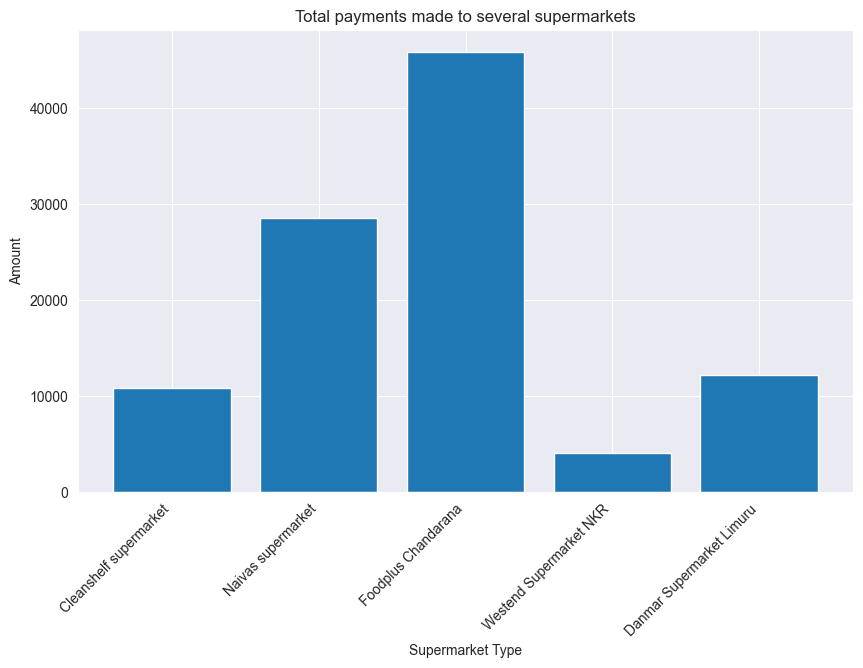

In [22]:
# Filter the dataframe for supermarket payments
cleanshelf_transactions = merged_data[merged_data['Details'].str.contains('CLEAN SHELF', case=False)]
naivas_transactions = merged_data[merged_data['Details'].str.contains('NAIVAS', case=False)]
foodplus_transactions = merged_data[merged_data['Details'].str.contains('Chandarana', case=False)]
westend_transactions = merged_data[merged_data['Details'].str.contains('WESTEND', case=False)]
danmar_transactions = merged_data[merged_data['Details'].str.contains('DANMAR', case=False)]

# Calculate the total payments for several supermarkets
cleanshelf_total = cleanshelf_transactions['Withdrawn'].sum()
naivas_total = naivas_transactions['Withdrawn'].sum()
foodplus_total = foodplus_transactions['Withdrawn'].sum()
westend_total = westend_transactions['Withdrawn'].sum()
danmar_total = danmar_transactions['Withdrawn'].sum()

# Create a bar plot
labels = ['Cleanshelf supermarket', 'Naivas supermarket', 'Foodplus Chandarana', 'Westend Supermarket NKR', 'Danmar Supermarket Limuru']
amounts = [cleanshelf_total, naivas_total, foodplus_total, westend_total, danmar_total]

plt.figure(figsize=(10, 6))  # Increase the figure size (width: 10 inches, height: 6 inches)
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total payments made to several supermarkets')
plt.xlabel('Supermarket Type')
plt.ylabel('Amount')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Display the plot
plt.show()


It can be seen that `Foodplus Chandarana` and `Naivas` having over `25,000` and also `cleanshelf` and `Westend` recording least payments 

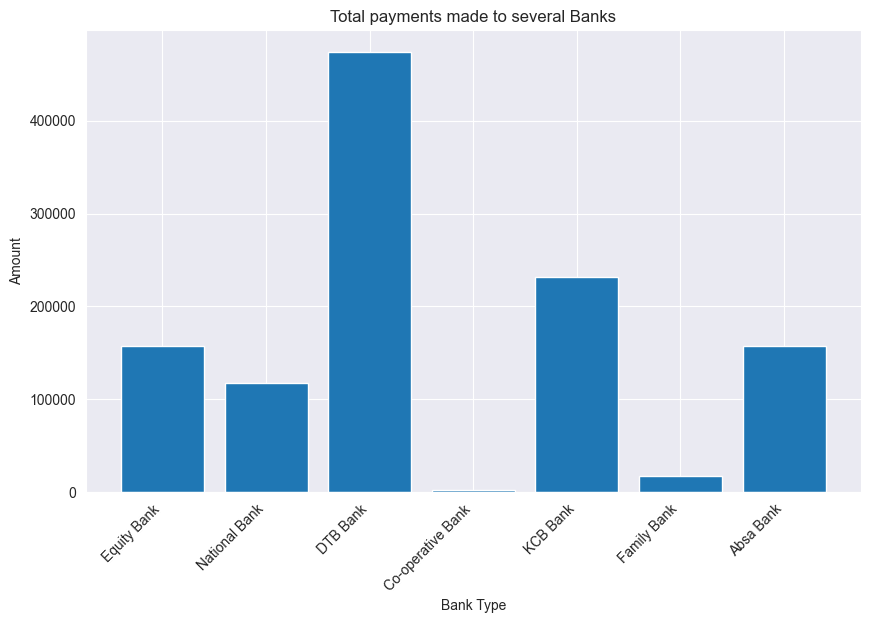

In [23]:

# Filtering dataframe for all payments made to banks
equity_transaction = merged_data[merged_data["Details"].str.contains('Equity', case=False)]
national_transaction = merged_data[merged_data["Details"].str.contains('NBK', case=False)]
dtb_transaction = merged_data[merged_data["Details"].str.contains('DTB', case=False)]
coop_transaction = merged_data[merged_data["Details"].str.contains('Co-operative', case=False)]
kcb_transaction = merged_data[merged_data["Details"].str.contains('KCB', case=False)]
family_transaction = merged_data[merged_data["Details"].str.contains('Family', case=False)]
absa_transaction = merged_data[merged_data["Details"].str.contains('Absa', case=False)]

# Calculate the total payments for several banks
equity_total = equity_transaction['Withdrawn'].sum()
national_total = national_transaction['Withdrawn'].sum()
dtb_total = dtb_transaction['Withdrawn'].sum()
coop_total = coop_transaction['Withdrawn'].sum()
kcb_total = kcb_transaction['Withdrawn'].sum()
family_total = family_transaction['Withdrawn'].sum()
absa_total = absa_transaction['Withdrawn'].sum()

# Create a bar plot
labels = ['Equity Bank', 'National Bank', 'DTB Bank', 'Co-operative Bank', 'KCB Bank', 'Family Bank', 'Absa Bank']
amounts = [equity_total, national_total, dtb_total, coop_total, kcb_total, family_total, absa_total]

plt.figure(figsize=(10, 6)) 
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total payments made to several Banks')
plt.xlabel('Bank Type')
plt.ylabel('Amount')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

# Display the plot
plt.show()


`DTB', KCB` and `Equity` and `Absa` leads with payments made which is over `140,000` while `Family` and `Co-operative` recording lesser payments of below `20,000.`

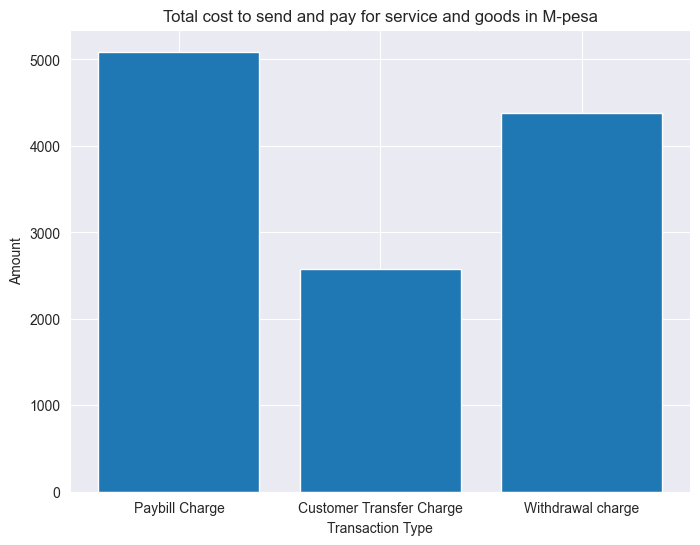

In [24]:
#filtering the dataframe to get charges 
pabill_transaction = merged_data[merged_data["Details"].str.contains('Pay Bill Charge', case=False)]
customer_sent_transaction = merged_data[merged_data["Details"].str.contains('Customer Transfer of Funds Charge', case=False)]
withdrawal_transaction = merged_data[merged_data["Details"].str.contains('Withdrawal Charge', case=False)]
# Calculate the total payments cost several charges 
paybill_total = pabill_transaction['Withdrawn'].sum()
customer_total = customer_sent_transaction['Withdrawn'].sum()
withdrawal_total = withdrawal_transaction['Withdrawn'].sum()

labels = ['Paybill Charge', 'Customer Transfer Charge', 'Withdrawal charge']
amount = [paybill_total, customer_total, withdrawal_total]

plt.figure(figsize=(8, 6)) 
plt.bar(labels, amount)

# Customize the plot
plt.title('Total cost to send and pay for service and goods in M-pesa')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()


From the graph it can be seen that most of the `charges` were deducted from `paybill payments` and `withdrawing` of money

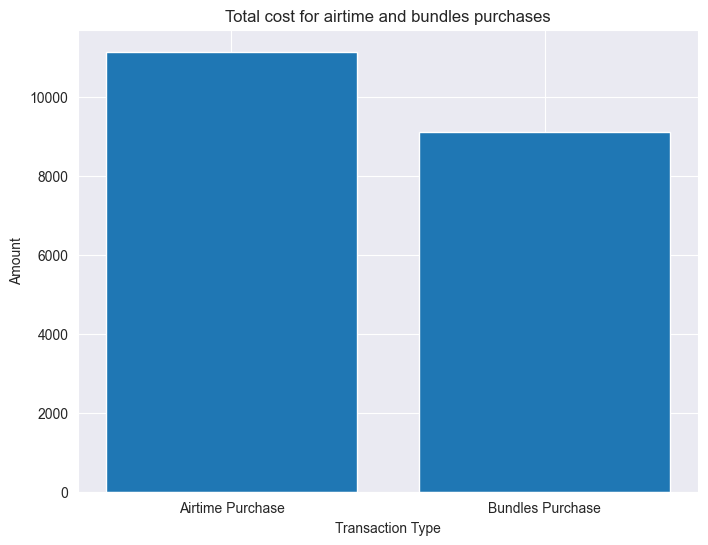

In [25]:
#filtering the dataframe to get sevral payments 
airtime_transaction = merged_data[merged_data["Details"].str.contains('Airtime Purchase', case=False)] 
bundles_transaction = merged_data[merged_data["Details"].str.contains('Buy Bundles Online', case=False)] 

#calculating totals for several purchases 
airtime_total = airtime_transaction['Withdrawn'].sum()
bundles_total = bundles_transaction['Withdrawn'].sum()

labels = ['Airtime Purchase', 'Bundles Purchase']
amount = [airtime_total, bundles_total]

plt.figure(figsize=(8, 6)) 
plt.bar(labels, amount)

# Customize the plot
plt.title('Total cost for airtime and bundles purchases')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()

Airtime purchaes took over `10,000` kenya shillings while bundles purchases recorded an average of `9,000` 

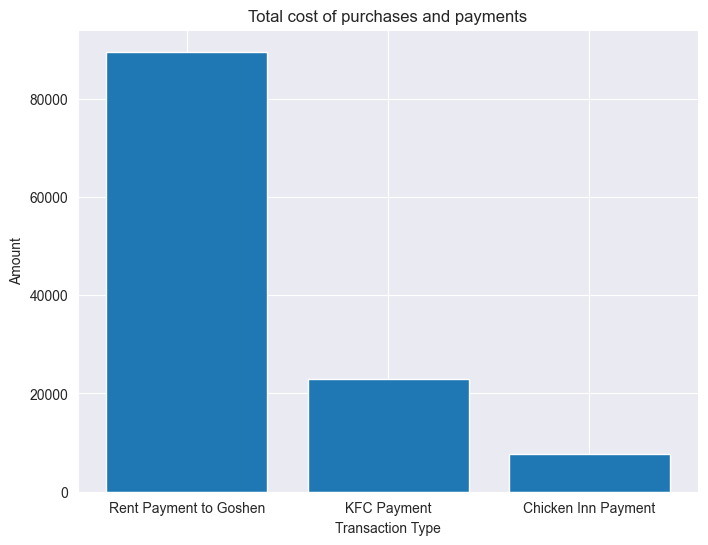

In [26]:
# Filtering the dataframe to get several payments
rent_transaction = merged_data[merged_data["Details"].str.contains('Goshen', case=False)]
kfc_transaction = merged_data[merged_data["Details"].str.contains('KFC', case=False)]
chicken_transaction = merged_data[merged_data["Details"].str.contains('CHICKEN', case=False)]

# Getting the amount used to make purchases and payments
rent_total = rent_transaction['Withdrawn'].sum()
kfc_total = kfc_transaction['Withdrawn'].sum()
chicken_total = chicken_transaction['Withdrawn'].sum()

labels = ['Rent Payment to Goshen', 'KFC Payment', 'Chicken Inn Payment']
amounts = [rent_total, kfc_total, chicken_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total cost of purchases and payments')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Display the plot
plt.show()


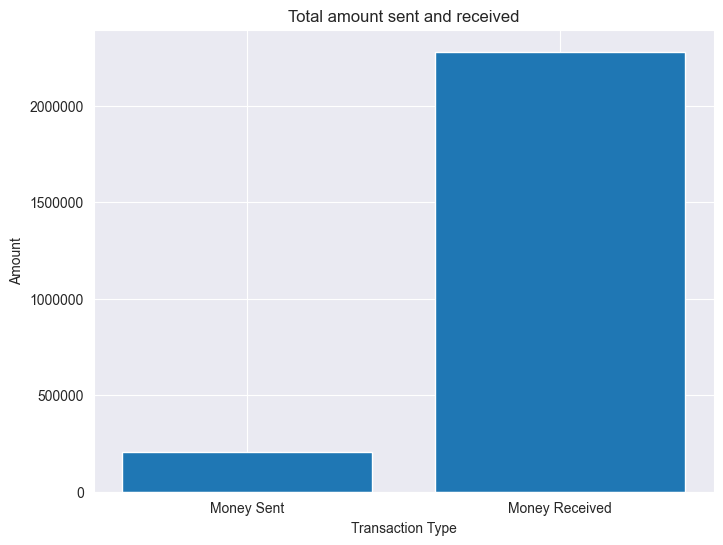

In [42]:

# Filtering the DataFrame to get money sent
sent_transaction = merged_data[merged_data["Details"].str.contains('Customer Transfer', case=False)]
# Getting the amount total for money sent
sent_total = sent_transaction['Withdrawn'].sum()

# Getting the amount total for money paid in
paid_in_total = paid_df['Paid In'].sum()

labels = ['Money Sent', 'Money Received']
amounts = [sent_total, paid_in_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total amount sent and received')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')

# Convert y-axis tick labels to plain format
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()



Totak money received was over Ksh `2 million` while money sent was slightly higher than Ksh `100,000`

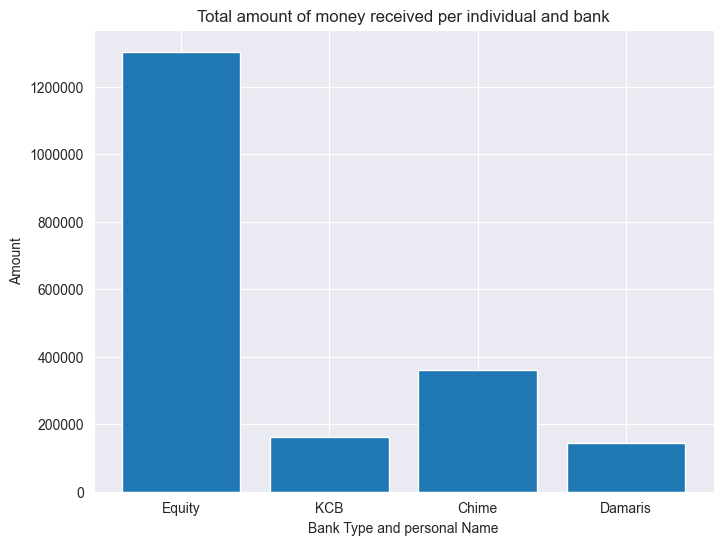

In [41]:
# filtering the data to get money sent 
equity2_transaction = paid_df[paid_df['Details'].str.contains('Equity', case=False)]
kcb2_transaction = paid_df[paid_df['Details'].str.contains('KCB', case=False)]
chime_transactions = paid_df[paid_df['Details'].str.contains('CHIME', case=False)]
damaris_transaction = paid_df[paid_df['Details'].str.contains('Damaris', case=False)]

#getting the amount total 
equity2_total = equity2_transaction['Paid In'].sum()
kcb2_total = kcb2_transaction['Paid In'].sum()
chime_total = chime_transactions['Paid In'].sum()
damaris_total = damaris_transaction['Paid In'].sum()


labels = ['Equity', 'KCB', 'Chime', 'Damaris']
amounts = [equity2_total, kcb2_total, chime_total, damaris_total]

plt.figure(figsize=(8, 6))
plt.bar(labels, amounts)

# Customize the plot
plt.title('Total amount of money received per individual and bank')
plt.xlabel('Bank Type and personal Name')
plt.ylabel('Amount')

# Convert y-axis tick labels to plain format
plt.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()


It can be seen from the graph that most of the funds were received from `equity` which is over ksh `1.2 million` and damaris having less than all which was slighlty over ksh `100,000.`

# 4.0 Modelling 

In [43]:

# Filtering the DataFrame for different transaction categories
cleanshelf_transactions = merged_data[merged_data['Details'].str.contains('CLEAN SHELF', case=False)]
naivas_transactions = merged_data[merged_data['Details'].str.contains('NAIVAS', case=False)]
foodplus_transactions = merged_data[merged_data['Details'].str.contains('Chandarana', case=False)]
westend_transactions = merged_data[merged_data['Details'].str.contains('WESTEND', case=False)]
danmar_transactions = merged_data[merged_data['Details'].str.contains('DANMAR', case=False)]
equity_transaction = merged_data[merged_data['Details'].str.contains('Equity', case=False)]
national_transaction = merged_data[merged_data['Details'].str.contains('NBK', case=False)]
dtb_transaction = merged_data[merged_data['Details'].str.contains('DTB', case=False)]
coop_transaction = merged_data[merged_data['Details'].str.contains('Co-operative', case=False)]
kcb_transaction = merged_data[merged_data['Details'].str.contains('KCB', case=False)]
family_transaction = merged_data[merged_data['Details'].str.contains('Family', case=False)]
absa_transaction = merged_data[merged_data['Details'].str.contains('Absa', case=False)]
pabill_transaction = merged_data[merged_data['Details'].str.contains('Pay Bill Charge', case=False)]
customer_sent_transaction = merged_data[merged_data['Details'].str.contains('Customer Transfer of Funds Charge', case=False)]
withdrawal_transaction = merged_data[merged_data['Details'].str.contains('Withdrawal Charge', case=False)]
airtime_transaction = merged_data[merged_data['Details'].str.contains('Airtime Purchase', case=False)]
bundles_transaction = merged_data[merged_data['Details'].str.contains('Buy Bundles Online', case=False)]
rent_transaction = merged_data[merged_data['Details'].str.contains('Goshen', case=False)]
kfc_transaction = merged_data[merged_data['Details'].str.contains('KFC', case=False)]
chicken_transaction = merged_data[merged_data['Details'].str.contains('CHICKEN', case=False)]

# Concatenate the filtered DataFrames into a new DataFrame
model_df = pd.concat([cleanshelf_transactions, naivas_transactions, foodplus_transactions, westend_transactions,
                      danmar_transactions, equity_transaction, national_transaction, dtb_transaction, coop_transaction,
                      kcb_transaction, family_transaction, absa_transaction, pabill_transaction,
                      customer_sent_transaction, withdrawal_transaction, airtime_transaction, bundles_transaction,
                      rent_transaction, kfc_transaction, chicken_transaction], ignore_index=True)


In [46]:
# Create a list of data frames and their respective column headers
data_frames = [cleanshelf_transactions, naivas_transactions, foodplus_transactions, westend_transactions,
               danmar_transactions, equity_transaction, national_transaction, dtb_transaction, coop_transaction,
               kcb_transaction, family_transaction, absa_transaction, pabill_transaction,
               customer_sent_transaction, withdrawal_transaction, airtime_transaction, bundles_transaction,
               rent_transaction, kfc_transaction, chicken_transaction]
column_headers = ['Cleanshelf', 'Naivas', 'FoodPlus', 'Westend', 'Danmar', 'Equity', 'National', 'DTB', 'Co-op',
                  'KCB', 'Family', 'Absa', 'Pay Bill Charge', 'Customer Transfer Charge', 'Withdrawal Charge',
                  'Airtime Purchase', 'Buy Bundles Online', 'Rent', 'KFC', 'Chicken']

# Filter out the data frames that are not present in the DataFrame
existing_data_frames = []
existing_column_headers = []
for df, header in zip(data_frames, column_headers):
    if len(df) > 0:  # Check if the DataFrame is not empty
        existing_data_frames.append(df)
        existing_column_headers.append(header)

# Concatenate the existing data frames vertically
model_df = pd.concat(existing_data_frames, ignore_index=True)

# Melt the data to reshape it with the desired column headings
melted_df = pd.melt(model_df, value_vars=existing_column_headers, var_name='Transaction Type', value_name='Amount')


KeyError: "The following 'value_vars' are not present in the DataFrame: ['Absa', 'Airtime Purchase', 'Buy Bundles Online', 'Chicken', 'Cleanshelf', 'Co-op', 'Customer Transfer Charge', 'DTB', 'Danmar', 'Equity', 'Family', 'FoodPlus', 'KCB', 'KFC', 'Naivas', 'National', 'Pay Bill Charge', 'Rent', 'Westend', 'Withdrawal Charge']"

In [49]:
import pandas as pd

# Filtering the DataFrame for different transaction categories
cleanshelf_transactions = merged_data[merged_data['Details'].str.contains('CLEAN SHELF', case=False)]
naivas_transactions = merged_data[merged_data['Details'].str.contains('NAIVAS', case=False)]
foodplus_transactions = merged_data[merged_data['Details'].str.contains('Chandarana', case=False)]
westend_transactions = merged_data[merged_data['Details'].str.contains('WESTEND', case=False)]
danmar_transactions = merged_data[merged_data['Details'].str.contains('DANMAR', case=False)]
equity_transaction = merged_data[merged_data['Details'].str.contains('Equity', case=False)]
national_transaction = merged_data[merged_data['Details'].str.contains('NBK', case=False)]
dtb_transaction = merged_data[merged_data['Details'].str.contains('DTB', case=False)]
coop_transaction = merged_data[merged_data['Details'].str.contains('Co-operative', case=False)]
kcb_transaction = merged_data[merged_data['Details'].str.contains('KCB', case=False)]
family_transaction = merged_data[merged_data['Details'].str.contains('Family', case=False)]
absa_transaction = merged_data[merged_data['Details'].str.contains('Absa', case=False)]
pabill_transaction = merged_data[merged_data['Details'].str.contains('Pay Bill Charge', case=False)]
customer_sent_transaction = merged_data[merged_data['Details'].str.contains('Customer Transfer of Funds Charge', case=False)]
withdrawal_transaction = merged_data[merged_data['Details'].str.contains('Withdrawal Charge', case=False)]
airtime_transaction = merged_data[merged_data['Details'].str.contains('Airtime Purchase', case=False)]
bundles_transaction = merged_data[merged_data['Details'].str.contains('Buy Bundles Online', case=False)]
rent_transaction = merged_data[merged_data['Details'].str.contains('Goshen', case=False)]
kfc_transaction = merged_data[merged_data['Details'].str.contains('KFC', case=False)]
chicken_transaction = merged_data[merged_data['Details'].str.contains('CHICKEN', case=False)]

# Concatenate the filtered DataFrames into a new DataFrame
model_df = pd.concat([cleanshelf_transactions, naivas_transactions, foodplus_transactions, westend_transactions,
                      danmar_transactions, equity_transaction, national_transaction, dtb_transaction, coop_transaction,
                      kcb_transaction, family_transaction, absa_transaction, pabill_transaction,
                      customer_sent_transaction, withdrawal_transaction, airtime_transaction, bundles_transaction,
                      rent_transaction, kfc_transaction, chicken_transaction], ignore_index=True)

# Include 'Receipt No.' and 'Completion Time' columns from merged_data
merged_df = merged_data.merge(model_df[['Receipt No.', 'Completion Time']], how='left', on='Receipt No.')
merged_df

,Receipt No.,Completion Time_x,Details,Transaction Status,Withdrawn,Balance,Completion Time_y
0,RGE2J693L4,2023-07-14 18:39:29,Customer Transfer of Funds Charge,Completed,6,194,2023-07-14 18:39:29
1,RGE2J693L4,2023-07-14 18:39:29,Customer Transfer to -,Completed,350,200,2023-07-14 18:39:29
2,RGE5J63C7N,2023-07-14 18:38:26,Merchant Payment to 7865893 Naivas Nakuru MidTown,Completed,15,550,2023-07-14 18:38:26
3,RGE2J5ZVRA,2023-07-14 18:37:52,Merchant Payment to 7865893 Naivas Nakuru MidTown,Completed,726,565,2023-07-14 18:37:52
4,RGE6IU1B8I,2023-07-14 17:06:30,Customer Transfer of Funds Charge,Completed,12,291,2023-07-14 17:06:30
...,...,...,...,...,...,...,...
3889,QD17NW5PY3,2022-04-01 21:27:19,Buy Bundles,Completed,10,1051,NaN
3890,QD17NSRWYN,2022-04-01 20:43:46,Customer Transfer of Funds Charge,Completed,12,1061,2022-04-01 20:43:46
3891,QD17NSRWYN,2022-04-01 20:43:46,Customer Transfer to -,Completed,827,1073,2022-04-01 20:43:46
3892,QD10NQWQJE,2022-04-01 20:23:30,Merchant Payment to 867307 CLEAN SHELF SUPERMA...,Completed,180,1900,2022-04-01 20:23:30


In [62]:
import pandas as pd

# Concatenate the filtered DataFrames into a new DataFrame
model_df = pd.concat([cleanshelf_transactions, naivas_transactions, foodplus_transactions, westend_transactions,
                      danmar_transactions, equity_transaction, national_transaction, dtb_transaction, coop_transaction,
                      kcb_transaction, family_transaction, absa_transaction, pabill_transaction,
                      customer_sent_transaction, withdrawal_transaction, airtime_transaction, bundles_transaction,
                      rent_transaction, kfc_transaction, chicken_transaction], ignore_index=True)

# Include 'Receipt No.' and 'Completion Time' columns from merged_data
merged_df = merged_data.merge(model_df[['Receipt No.', 'Completion Time']], how='left', on='Receipt No.')

# Melt the data to reshape it
melted_df = pd.melt(merged_df, id_vars=['Receipt No.'], value_vars=model_df.columns[2:],
                    var_name='Transaction Type', value_name='Amount')


# 5.0 Conclusion 
- From analysis above it can be seen that the Mpesa received alot of money rather the ones paid out. 
- Also alot of money spend on shopping in supermarkets. 
- Airtime and bundles purchases consumed a fair amount of money 
- Purchases of fast food mostly from KFC took alot of money and hence needs regulation
- Rent payment was among the  most expesive service in the that one year period hence looking for cheaper rooms or planning for alternative accomadation is neccesary 


# 6.0 Challenges
- converting the data from pdf to excel led to alot of missing values and data inconsistencies 
- There was less details analyzed caused by data inconsitencies 
- too little data was analysed due to loss 
- Very hard to melt the data for modelling and prediction of future usage 

# 7.0 Recommendation 
- There is need to convert data well to reduce inconsitencies and missing values.
- Conduct more data analysis to get deeper insights.
- There is need for melting data and getting more insights in future for prediction hence regulating usage and enhance savings 